In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

2024-05-31 23:03:48.877288: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_images, train_labels),  (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

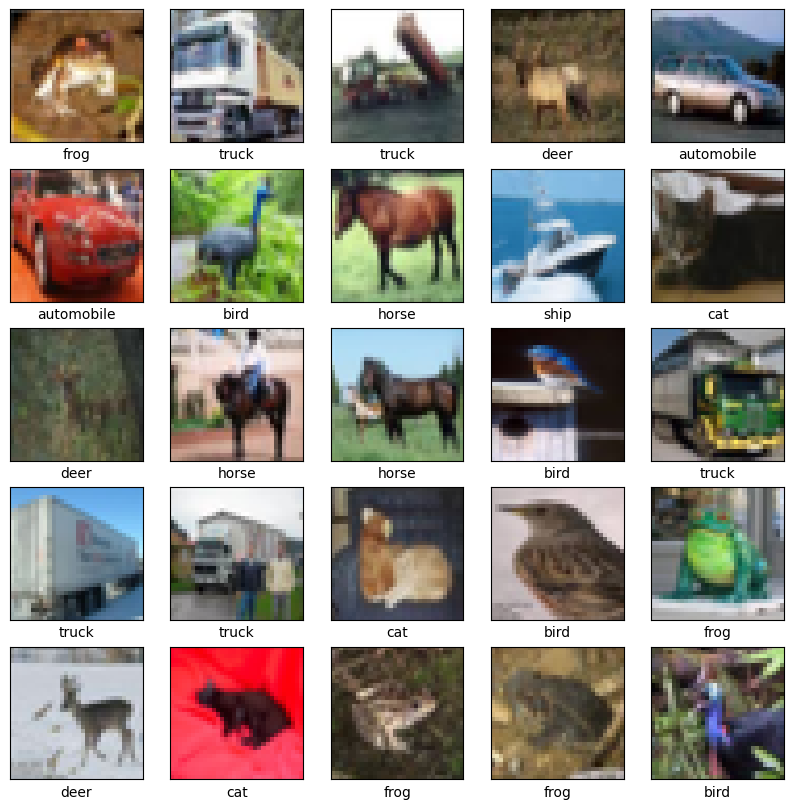

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])

    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [8]:
## Creating the Convolutional Neural Network model 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

## Neural Network
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10))

## Display model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.6085 - accuracy: 0.4041 - val_loss: 1.2807 - val_accuracy: 0.5391
Epoch 2/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.2590 - accuracy: 0.5515 - val_loss: 1.1724 - val_accuracy: 0.5826
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1189 - accuracy: 0.6060 - val_loss: 1.0569 - val_accuracy: 0.6229
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0241 - accuracy: 0.6385 - val_loss: 1.0224 - val_accuracy: 0.6402
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9530 - accuracy: 0.6642 - val_loss: 0.9568 - val_accuracy: 0.6605
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8984 - accuracy: 0.6848 - val_loss: 0.9593 - val_accuracy: 0.6620
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8518 - accuracy: 0.7018 - val_loss: 0.9231 -

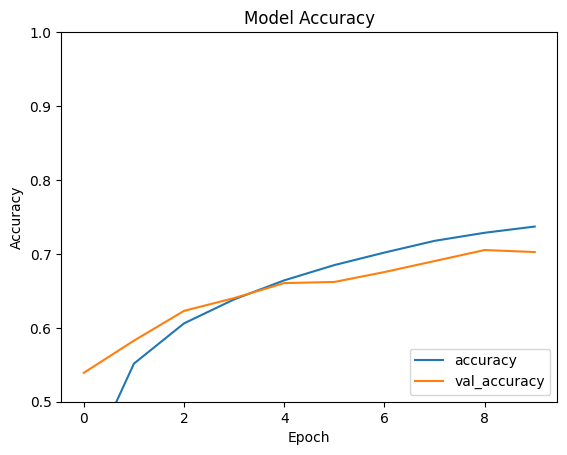

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

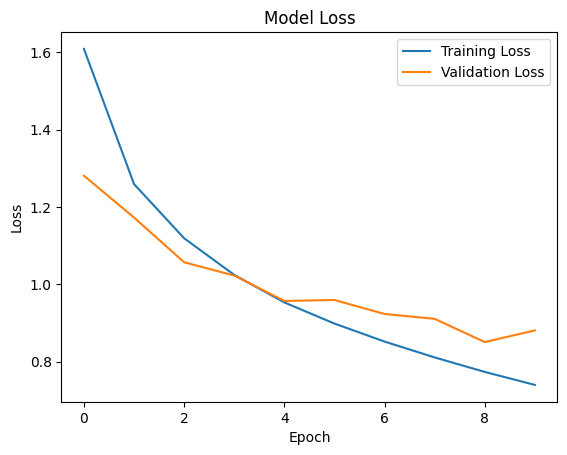

In [10]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [16]:
#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
#print("Test Accuracy: ", test_acc)
#print("Test Loss: ", test_loss)